# Titanic Dataset Project

In this notebook I will deploy machine learning models to predict the probability of a passenger surviving the 1912 Titanic disaster based on a number of classifying parameters. 

The project consists of the following steps:
* Retreiving the dataset from Kaggle.com
* Exploratory Data Analysis
* Feature Engineering of the data into a suitable form for models
* Building and comparing machine learning models
* Submission of prediction data in a suitable form to Kaggle.com

In [1]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c titanic

test.csv: Skipping, found more recently modified local copy (use --force to force download)
gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


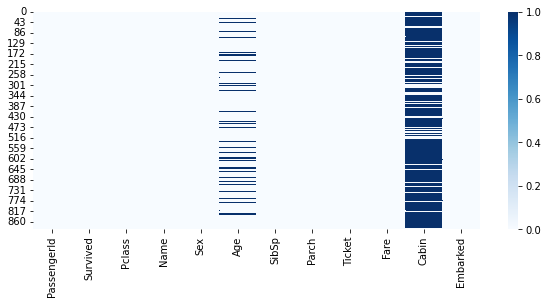

In [6]:
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(),cmap='Blues')

There are a lot of missing values in the Age and Cabin columns. I will attempt to address these following the preliminary data analysis.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


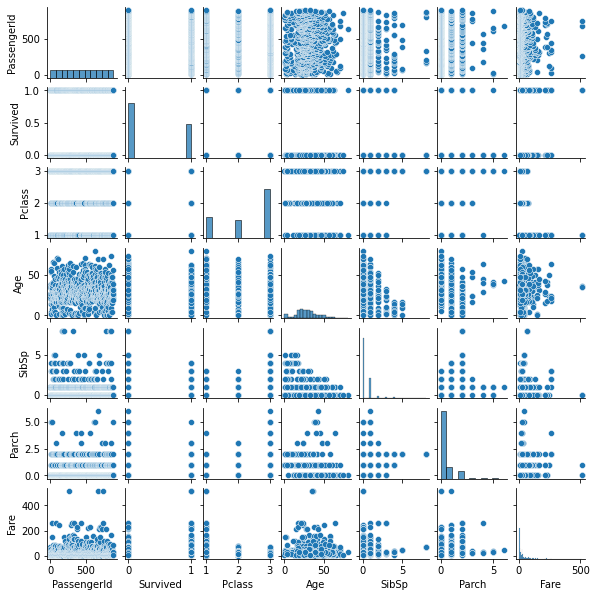

In [9]:
sns.pairplot(df,height=1.2)

In [10]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


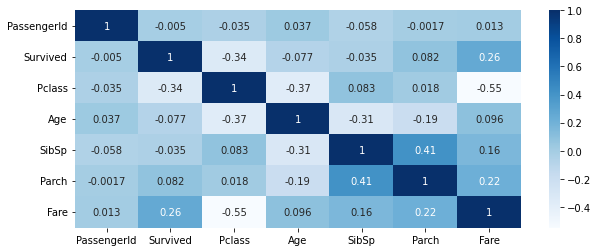

In [11]:
plt.figure(figsize=(10,4))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

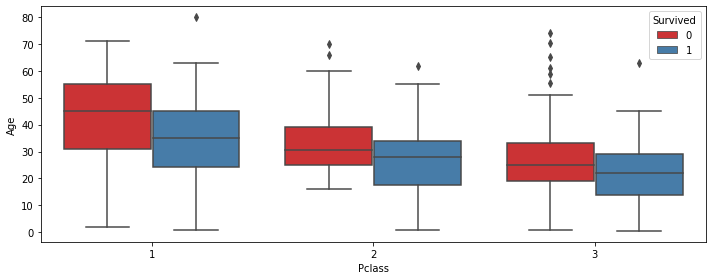

In [12]:
plt.figure(figsize=(10,4))
sns.boxplot(x='Pclass',y='Age',hue='Survived',data=df,palette='Set1')
plt.tight_layout()

There is a positive correlation between survival and the fare paid. The mean passenger age has an inverse correlation with the passenger class, which is to be expected, as older people tend to have accumulated more wealth throughout their lives. There is a clear skew towards survival of younger people within each passenger class. In particular the mean age of a survivor in first class was approximately 35 years old, with the mean age of a deceased person in the same class being around 45.

<Figure size 720x288 with 0 Axes>

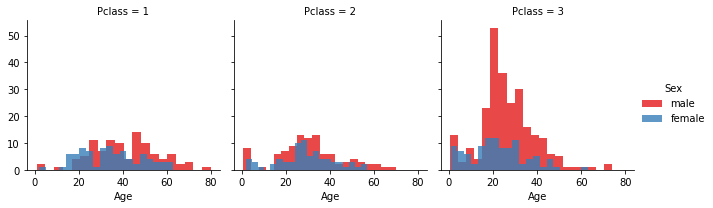

In [13]:
plt.figure(figsize=(10,4))
g = sns.FacetGrid(df, col = 'Pclass', hue = 'Sex',palette='Set1')
g = g.map(plt.hist, 'Age', alpha = 0.8,bins=20)
g.add_legend()

Interestingly there were considerably more male passengers than female. The data for the third class ticket holders shows a strong skew towards male travellers. A possible reason for this is that there were a large number of working class men looking to emigrate to the United States in search of work and a better future.

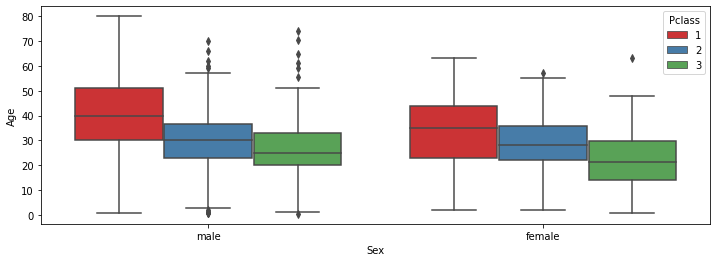

In [14]:
plt.figure(figsize=(12,4))
sns.boxplot(y = 'Age', x = 'Sex', data = df, hue = 'Pclass',palette='Set1')

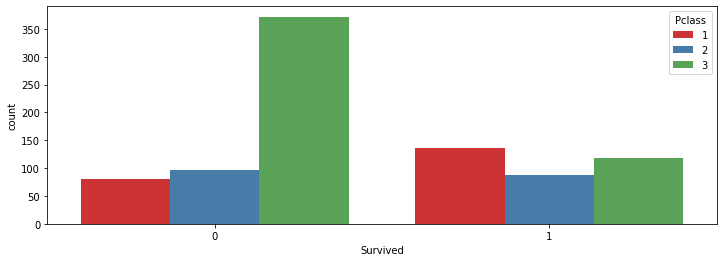

In [15]:
plt.figure(figsize=(12,4))
sns.countplot(x='Survived',hue='Pclass',data=df,palette='Set1')

In [16]:
df.groupby(['Sex','Pclass','Survived']).count().PassengerId

Sex     Pclass  Survived
female  1       0             3
                1            91
        2       0             6
                1            70
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
Name: PassengerId, dtype: int64

Survival data shows a very large proportion of third class ticket holders perished. Out of the third class ticket holders, 86.4% of males and 50% of females did not survive, compared with 63.1% of males and 3.2% of females holding a first class ticket. By far the greatest chance of survival was for females first and second class ticket holders, for whom the probability of survival is 94.7%.

Data Cleaning - proceed to fill in the missing values in the Age column with the mean value for the passenger in that class.

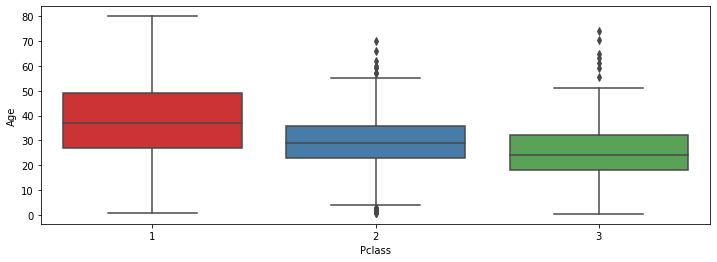

In [17]:
plt.figure(figsize=(12, 4))
sns.boxplot(x='Pclass',y='Age',data=df,palette='Set1')

In [18]:
def fill_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
      if Pclass == 1:
        return 37

      elif Pclass == 2:
        return 29

      else:
        return 24

    else:
        return Age

In [19]:
df['Age'] = df[['Age','Pclass']].apply(fill_age,axis=1)
test['Age'] = test[['Age','Pclass']].apply(fill_age,axis=1)

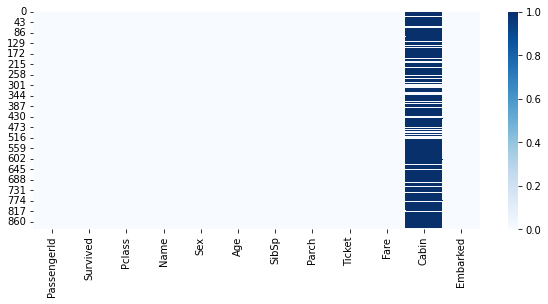

In [20]:
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(),cmap='Blues')

In [21]:
# it looks like the Cabin column has too many missing values to be useable, so we will drop this column.
df.drop('Cabin',axis=1,inplace=True)

In [22]:
test.drop('Cabin',axis=1,inplace=True)

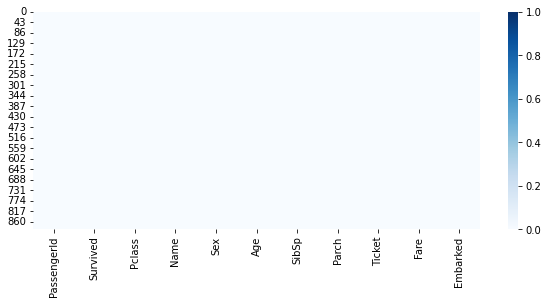

In [23]:
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(),cmap='Blues')

In [24]:
df.dropna(inplace=True)

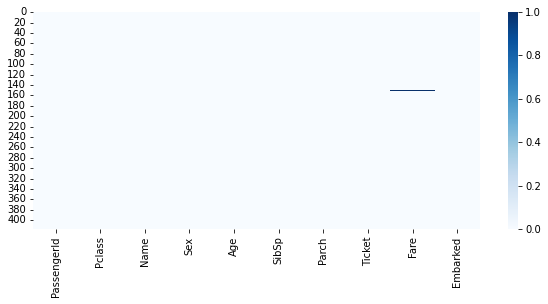

In [25]:
plt.figure(figsize=(10,4))
sns.heatmap(test.isnull(),cmap='Blues')

In [32]:
#there is a single null value in the fare of the passenger below.
test[test['Fare'].isnull()==True]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [33]:
#the mean value of a third class ticket is 13.68, so I will replace the NaN value in the test data set with this value
df.groupby('Pclass')['Fare'].mean()

Pclass
1    84.193516
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [42]:
test[test['Fare'].isnull()==True]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [51]:
test.loc[152, 'Fare'] = 13.68

In [52]:
test[test['Fare'].isnull()==True]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


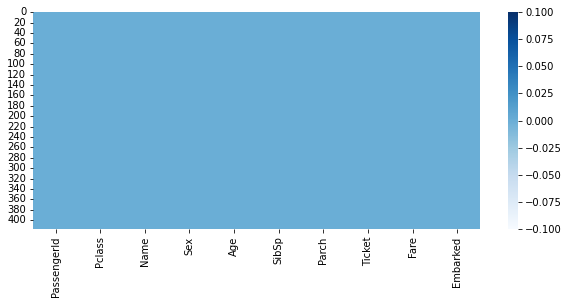

In [54]:
#there are now no more null values in the test data set.
plt.figure(figsize=(10,4))
sns.heatmap(test.isnull(),cmap='Blues')

In [55]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)

In [56]:
t_sex = pd.get_dummies(test['Sex'],drop_first=True)
t_embark = pd.get_dummies(test['Embarked'],drop_first=True)

In [57]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [58]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [59]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [60]:
df = pd.concat([df,sex,embark],axis=1)
test = pd.concat([test,t_sex,t_embark],axis=1)

In [61]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [62]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


Now to split the data and deploy a number of models to determine which gives the lowest prediction error on the development set. I will compare results from the models below:

* Logistic Regression Algorithm
* Naive Bayes Algorithm
* Random Forest Algorithm
* Support Vector Machine
* Artificial Neural Network using Keras

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_val, y_train, y_val = train_test_split(df.drop('Survived',axis=1), 
                                                    df['Survived'], test_size=0.20, 
                                                    random_state=42)

In [65]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
scaler = MinMaxScaler()

In [67]:
scaler.fit(X_train)

MinMaxScaler()

In [68]:
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

First try a logistic regression model.

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
log_reg_pred = log_reg.predict(X_val)

In [71]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_val,log_reg_pred))
print(confusion_matrix(y_val,log_reg_pred))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       109
           1       0.70      0.75      0.73        69

    accuracy                           0.78       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.78      0.78      0.78       178

[[87 22]
 [17 52]]


Next try a naive Bayes model.

In [72]:
from sklearn.naive_bayes import GaussianNB

In [73]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_pred = gnb.predict(X_val)

In [74]:
print(classification_report(y_val,gnb_pred))
print(confusion_matrix(y_val,gnb_pred))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       109
           1       0.69      0.77      0.73        69

    accuracy                           0.78       178
   macro avg       0.76      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178

[[85 24]
 [16 53]]


Try a random forest model, initially with 100 estimators.

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_val)

In [77]:
print(classification_report(y_val,rfc_pred))
print(confusion_matrix(y_val,rfc_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       109
           1       0.75      0.74      0.74        69

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178

[[92 17]
 [18 51]]


Accuracy with different number of estimaters:
* 100: 79%
* 200: 79% 
* 300: 80%
* 500: 80%

There doesn't appear to be any improvement in accuracy above 300 estimators.

Next we will try a support vector machine model.

In [78]:
from sklearn.svm import SVC

In [79]:
svc = SVC()
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_val)

In [80]:
print(classification_report(y_val,svc_pred))
print(confusion_matrix(y_val,svc_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85       109
           1       0.83      0.64      0.72        69

    accuracy                           0.81       178
   macro avg       0.82      0.78      0.79       178
weighted avg       0.81      0.81      0.80       178

[[100   9]
 [ 25  44]]


SVM model seems to give the best accuracy of 81% on the validation data so far. Finally I will try an artificial neural network using Keras.

In [81]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [82]:
X_train.shape
#9 input variables, so we require 9 inputs to neural network

(711, 9)

In [83]:
model = Sequential()
#define number of model layers and number of neurons in each layer
model.add(Dense(units=9,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=7,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=5,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=3,activation='relu'))
model.add(Dropout(0.2))
# This is a binary classification problem, so we require a sigmoid activation function
model.add(Dense(units=1,activation='sigmoid'))
# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [84]:
model.fit(x=X_train,y=y_train,epochs=200,batch_size=256,validation_data=(X_val, y_val))

Epoch 1/200
3/3 [==============================] - 1s 106ms/step - loss: 0.7513 - val_loss: 0.7263
Epoch 2/200
3/3 [==============================] - 0s 15ms/step - loss: 0.7461 - val_loss: 0.7208
Epoch 3/200
3/3 [==============================] - 0s 16ms/step - loss: 0.7393 - val_loss: 0.7155
Epoch 4/200
3/3 [==============================] - 0s 18ms/step - loss: 0.7226 - val_loss: 0.7102
Epoch 5/200
3/3 [==============================] - 0s 14ms/step - loss: 0.7312 - val_loss: 0.7053
Epoch 6/200
3/3 [==============================] - 0s 16ms/step - loss: 0.7201 - val_loss: 0.7009
Epoch 7/200
3/3 [==============================] - 0s 21ms/step - loss: 0.7092 - val_loss: 0.6974
Epoch 8/200
3/3 [==============================] - 0s 18ms/step - loss: 0.7140 - val_loss: 0.6948
Epoch 9/200
3/3 [==============================] - 0s 18ms/step - loss: 0.7089 - val_loss: 0.6930
Epoch 10/200
3/3 [==============================] - 0s 16ms/step - loss: 0.7004 - val_loss: 0.6916
Epoch 11/200
3/3 [

In [85]:
from tensorflow.keras.models import load_model

In [86]:
model.save('full_data_project_model.h5')

In [87]:
model_loss = pd.DataFrame(model.history.history)

In [88]:
model_loss.head()

,loss,val_loss
0,0.751329,0.726286
1,0.746124,0.720794
2,0.739264,0.715521
3,0.722560,0.710238
4,0.731164,0.705303


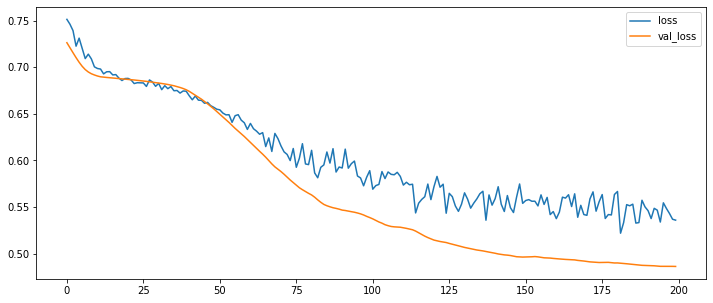

In [89]:
model_loss.plot(figsize=(12,5))

In [90]:
neural_pred = (model.predict(X_val) > 0.5).astype("int32")

In [91]:
print(classification_report(y_val,neural_pred))
print(confusion_matrix(y_val,neural_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       109
           1       0.79      0.65      0.71        69

    accuracy                           0.80       178
   macro avg       0.80      0.77      0.78       178
weighted avg       0.80      0.80      0.79       178

[[97 12]
 [24 45]]


Neural network gives performance comparable to the other models, with a predictive accuracy of 80% on the development data set. 

Random Forest Classifier with 300 estimators appeared to give the best balance of correct predictions in the training set, so I will deploy this model on the test data set and submit it to the Kaggle competition.

In [96]:
#first need to scale the test set as I did for the training set models.
test_scaler = MinMaxScaler()

In [97]:
test_scaler.fit(test)
X_test = scaler.transform(test)

In [102]:
y_test_pred = rfc.predict(X_test)

In [103]:
y_test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [105]:
test["Survived"] = y_test_pred
output = test[["PassengerId", "Survived"]]

In [108]:
output.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


In [109]:
output.to_csv("output.csv", index=False)

This submission achieved a score of 77% survival accuracy on the test data set. I will continue to consider alternative models in order to try to achieve a better predictive accuracy.